#### 참고: 크롬브라우저 HTML 요소 찾기 힘들다.

## 크롬브라우저에서 HTML 요소의 계층을 찾기가 쉽지 않다.
> 그런 점에서 생성AI가 편의를 제공한다. 
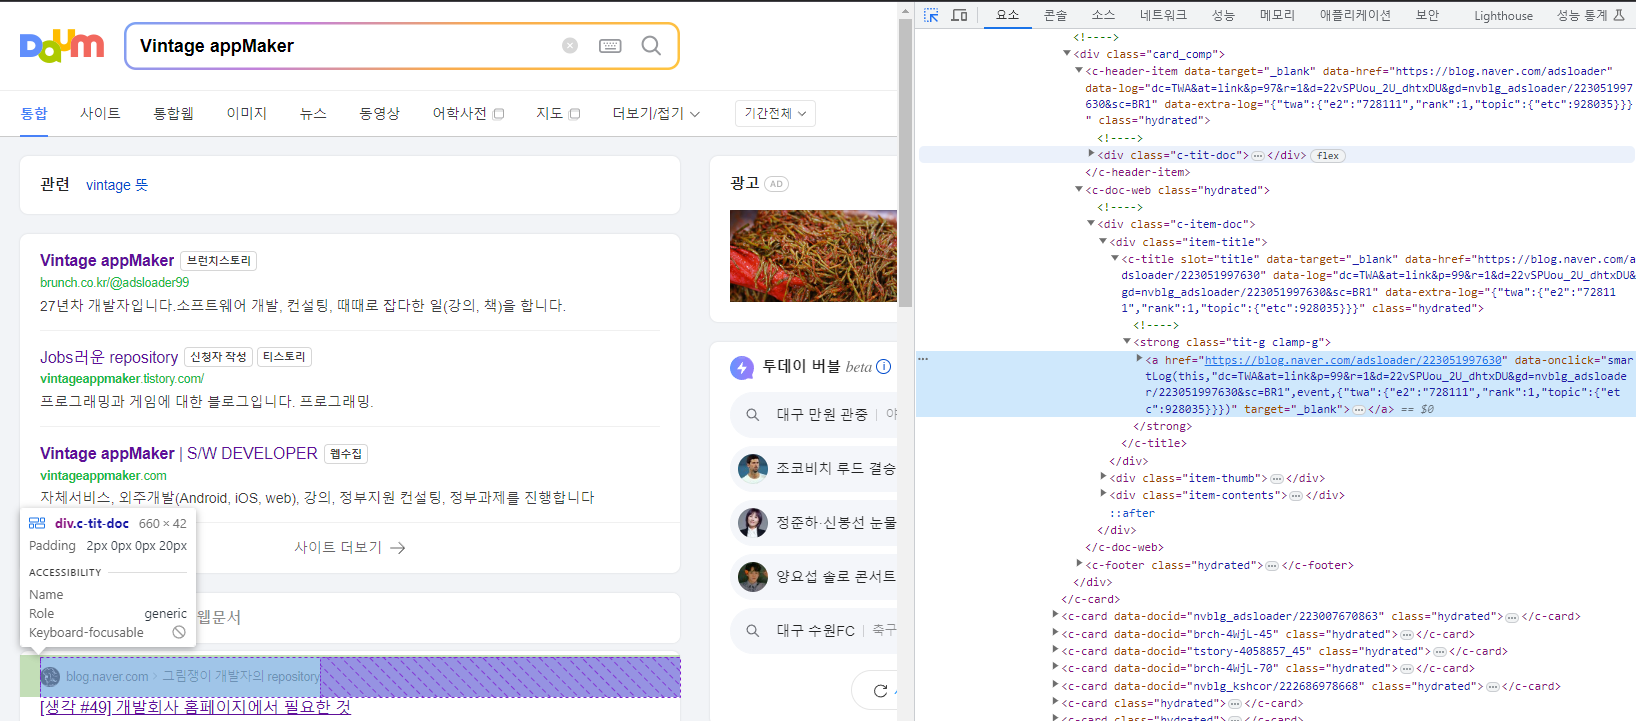

# 크롬브라우저의 디버깅 모드로 크롤링
> 크롬브라우저의 디버깅 모드에서 HTML 요소를 파악하고 그 계층 구초를 이해한 후, ChatGPT에게 코드를 생성하도록 Prompt를 다음과 같이 던졌다.
Person👨🏾‍🦳: 
 
```
1. 웹크롤링을 파이썬으로 한다.
2. https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=Vintage+appMaker
로 이동한다.
3. <strong class="tit-g clamp-g">안의 <a>태크의 href 정보와 내용을 가져온다.
4. 리스트를 화면에 출력한다.
```

ChatGPT🤖: 
- 아래는 파이썬을 사용하여 웹 크롤링을 수행하고 원하는 정보를 가져와 화면에 출력하는 예제입니다. 예제에서는 BeautifulSoup 라이브러리를 사용하여 HTML을 파싱하고 요소를 추출합니다.

```python

import requests
from bs4 import BeautifulSoup

# 웹 페이지에 접속하여 HTML 데이터를 가져옴
url = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=Vintage+appMaker"
response = requests.get(url)
html = response.text

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html, 'html.parser')

# 필요한 요소를 추출하여 출력
items = soup.find_all('strong', class_='tit-g clamp-g')

for item in items:
    # href 정보 가져오기
    href = item.a['href']
    # 내용 가져오기
    content = item.a.get_text()
    print("Href:", href)
    print("Content:", content)
    print()
```



위의 코드를 실행하면 해당 URL에서 `<strong class="tit-g clamp-g">` 태그 안의 `<a>` 태그의 href 정보와 내용을 가져와서 리스트 형태로 화면에 출력합니다.


In [ ]:
!pip install requests
!pip install BeautifulSoup

import requests
from bs4 import BeautifulSoup

# 웹 페이지에 접속하여 HTML 데이터를 가져옴
url = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=Vintage+appMaker"
response = requests.get(url)
html = response.text

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html, 'html.parser')

# 필요한 요소를 추출하여 출력
items = soup.find_all('strong', class_='tit-g clamp-g')

for item in items:
    # href 정보 가져오기
    href = item.a['href']
    # 내용 가져오기
    content = item.a.get_text(strip = True)
    print("Href:", href)
    print("Content:", content)
    print()


- 👨🏾‍🦳 위의 소스코드는 버그가 있다. content가 출력되지 않는다. 그래서 prompt로 질의를 해보아도 원하는 결과를 얻지 못했다. 결국 디버깅을 다음과 같이 print()를 찍어가며 하기로 결정했다.

```python
    # 디버깅 - 값을 어떻게 가져왔는지 채크하기 위함
    print("디버깅===========")
    print("1.item => " + str(item))
    print("2.item.a => " + str(item.a))
    print("3.item.a.contents => " + str(item.a.contents))
    print("디버깅===========")

```

In [ ]:
import requests
from bs4 import BeautifulSoup

# 웹 페이지에 접속하여 HTML 데이터를 가져옴
url = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=Vintage+appMaker"
response = requests.get(url)
html = response.text

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html, 'html.parser')

# 필요한 요소를 추출하여 출력
items = soup.find_all('strong', class_='tit-g clamp-g')

for item in items:
    # 디버깅 - 값을 어떻게 가져왔는지 채크하기 위함
    print("디버깅===========")
    print("1.item => " + str(item))
    print("2.item.a => " + str(item.a))
    print("3.item.a.contents => " + str(item.a.contents))
    print("디버깅===========")
    
    # href 정보 가져오기
    href = item.a['href']

    # 내용 가져오기
    # 디버깅으로 판단시 item.a.contents[0]이 맞음
    content = item.a.get_text(strip = True)
    print("Href:", href)
    print("Content:", content)
    print()


- 결론적으로 

```python
content = item.a.get_text(strip = True)
```
대신

```python
content = item.a.contents[0]
```
이 올바른 결과를 가져온다.